In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import bisect

In [56]:
givenPoints = np.load('npys/givenPoints.npy')
edges = np.load('npys/edges.npy')
intersections = np.load("npys/intersections.npy")

In [57]:
y = givenPoints[:,0:2]


plt.scatter(y[:,0],y[:,1])
plt.show()

In [58]:
def traslate(point,a=1.45,b=399,c =-1.44 ,d =308, scale  = 2):
    x,y = point
    return 2*int (a*x+b) ,  2*int (c*y+d)

In [59]:
def get_point(s):
    s-=1
    if (s>39):
        point = (intersections[s-40][0],intersections[s-40][1])
    else:
        point = (givenPoints[s][0],givenPoints[s][1])
        
    return point
get_point(42)

(27.0, 18.0)

True

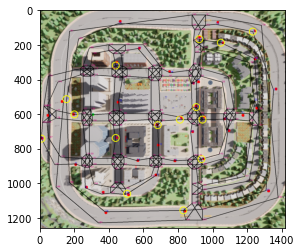

In [60]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 1


img = cv2.imread("RawImg.png")
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)


def plotImg(mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True, Path = np.array([]), splitPath = False):
    img = cv2.imread("RawImg.png")


    
    
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    c = 1

    for x,y,_ in givenPoints:
        x,y = traslate(point=(x,y))

        bottomLeftCornerOfText = (x,y)
        
        if mainPointsText == True:
            cv2.putText(img, str(c), bottomLeftCornerOfText, font,fontScale,fontColor,thickness, lineType)
        
        if mainPointsCircles == True:
            img = cv2.circle(img, (x, y), 3, (00,255,255), 2)
        c+=1




    imgcopy = img
    if showEdges == True:
        for s,d in edges:    
            cv2.line(imgcopy, traslate(point= get_point(s)), traslate(point= get_point(d)), (0,0,0), 2)
        



    fif = np.array([   2  , 4 , 34 , 11 ,  8 ,15, 13 , 27 , 18 , 20  ,23 , 25,  16 , 12, 36])

    for desierdPoint in fif:
        (x, y) = get_point(desierdPoint)
        x,y = traslate(point= (x, y))
        cv2.circle(imgcopy, (x, y), 20, (00,255,255), 3)

    for x,y in intersections:
        x,y = traslate(point= (x, y))

        bottomLeftCornerOfText = (x,y)
        

        if interPointsCircles == True:
            cv2.circle(imgcopy, (x, y), 3, (00,255,255), 2)
        
        if interPointsText == True:
            cv2.putText(imgcopy, str(c), bottomLeftCornerOfText, font,fontScale*0.8,(120,0,200),thickness, lineType)
        
        c+=1
        
                
    if Path.shape[0]> 0 :
        n = Path.shape[0]
        c = 1

        if splitPath == True:
            step = 15
            
        else :
            step = n
            
        temp = imgcopy
        imgC = 1
        
        for j in range(-1, n, step):
            if splitPath == True: 
                imgcopy = np.array(temp)
            for i in range (j,min (j+step, n),1):
                if (i==-1):
                    s=1
                    d= int (Path[i+1])
                elif i==n-1:
                    s =  int (Path[i])
                    d = int (1)
                else:
                    s =  int (Path[i])
                    d = int (Path[i+1])

                sx, sy = traslate(point= get_point(s))
                dx, dy = traslate(point= get_point(d))
                
                center = (int ((sx+dx)/2) , int ((sy+dy)/2))
                cv2.putText(imgcopy, str(c), center, font,fontScale,(0,0,0),thickness*2, lineType)


                cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
                c+=1

            if splitPath == True:
                cv2.imwrite('pathes//path' + str(imgC) + '.png', imgcopy)
            imgC+=1

    return imgcopy



img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True)
plt.imshow(img[:,:,::-1])
cv2.imwrite('out.png', img)
    

In [61]:
graphList = {}


for s, d in edges:
    
    dis = math.dist(get_point(s),get_point(d))
    if str(s) in graphList and  str(d) in graphList:
        graphList[str(s)].append((d,dis))
        #graphList[str(d)].append((s,dis))
        
    elif str(s) in graphList:
        graphList[str(s)].append((d,dis))
       # graphList[str(d)] = [(s,dis)]
    elif str(d) in graphList: 
       # graphList[str(d)].append((s,dis))
        graphList[str(s)] = [(d,dis)]     
    else:
        graphList[str(s)] = [(d,dis)]
      #  graphList[str(d)] = [(s,dis)]   
        
print( (graphList["118"]))            
    

[(121, 9.486832980505138), (117, 24.0), (123, 27.65863337187866), (119, 15.0)]


In [62]:
TotalNodeCount = givenPoints.shape[0] + intersections.shape[0]

graphMarix = np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=float)
graphMarix = graphMarix * float('inf')

for s, d in edges:
    dis = math.dist(get_point(s),get_point(d))
    
    graphMarix[s][d] = dis
    #graphMarix[d][s] = dis

np.fill_diagonal(graphMarix,0)
graphMarix[0][0] = float('inf')

In [63]:
dp = graphMarix

next =  np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=int)
next = next * -1

for j in range (1, TotalNodeCount+1):
    for i in range (1, TotalNodeCount+1):
        if (dp[j][i] != float('inf') ):
            next[j][i] = i 

In [64]:
for k in range (1, TotalNodeCount+1):
    for j in range (1, TotalNodeCount+1):
        for i in range (1, TotalNodeCount+1):
            if (dp[j][k]  + dp[k][i] < dp[j][i] ):
               dp[j][i] =  dp[j][k]  + dp[k][i]
               next[j][i] = next[j][k]

In [65]:
dp[50][100]

354.94145650168446

In [66]:
def getPath(start, end, ans=None):
    start = int(start)
    end = int(end)
    if (ans == None):
        ans = [start]
    else:
        ans.append(start)

    if (start == end):
        return np.array(ans)
    start = next[start][end]
    return getPath(start, end, ans)


In [67]:
def getDensePath (Path):
    finalpath = getPath(1, Path[0], ans = None)

    n = Path.shape[0]

    for i in range (n-1):
        finalpath = np.concatenate( (finalpath, getPath( Path[i],Path[i+1], ans = None)), axis=None  )

    finalpath = np.concatenate( (finalpath, getPath( Path[n-1],1, ans = None)), axis=None  )     
    
    newfinalPath = np.array([], dtype=int)


    for i in range (finalpath.shape[0]):
        if (newfinalPath.shape[0] == 0 or finalpath[i]!= newfinalPath [ newfinalPath.shape[0] -1]):
            newfinalPath = np.insert(newfinalPath, newfinalPath.shape[0], finalpath[i])
    
    
    return newfinalPath
getDensePath(np.array([11]))

array([  1, 106,  84,  83,  72,  73,  74,  75,  10,  11,  71,  82,  85,
         1])

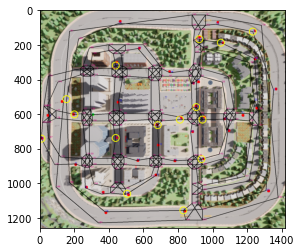

In [68]:
img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True)

plt.imshow(img[:,:,::-1])


In [69]:
ALPHA = 4
BETA = 2
RHO = 0.4
Q = 0.1

bestcost=100000
bestpath=None

In [70]:
class Ant:

    def __init__(self):
        self.visited_stations = np.empty(shape=0, dtype=int)
        self.visited_stations = np.append(self.visited_stations, 1)
        self.currentStation = 0
        self.distance = 0
        # self.way = np.empty(shape=0, dtype=int)

    def __str__(self):

        return f"{self.distance}\n{self.visited_stations}"

    def get_distance_travelled(self):
        dist = 0
        """for i in range(self.visited_stations.size - 1):
            self.way = np.append(self.way, getPath(self.visited_stations[i], self.visited_stations[i + 1]))
        """
        for j in range(self.visited_stations.size - 1):
            dist += dp[int(self.visited_stations[j])][int(self.visited_stations[j + 1])]
        self.distance = dist
        return dist
        """Return the total distance travelled by the ant"""

    def visit_station(self, pheromone_matrix):
        if random.random() < Q:
            x = self.visit_random_station()
            #print(x)
            self.visited_stations = np.append(self.visited_stations, x)
        else:
            possible_indexes, possible_probabilities, possible_stations_count = self.visit_probablistic_station(
                pheromone_matrix, dp)
            y = self.roulette_wheel_selection(
                possible_indexes, possible_probabilities, possible_stations_count)
            #print(y)
            self.visited_stations = np.append(self.visited_stations, y)
        # self.get_distance_travelled()
        """Add the next station to the visited array"""

    def visit_random_station(self):
        all_stations = np.array([2,  4,  8, 138,  13 , 27 , 18 , 20 , 23 , 25,  42,  81,  73,  91, 117,])
        bool_arr = np.in1d(all_stations, self.visited_stations)
        possible_cities = all_stations[np.logical_not(bool_arr)]
        return possible_cities[random.randint(0, len(possible_cities) - 1)]
        """Add the next random station to the visited array"""

    def visit_probablistic_station(self, pheromone_matrix, dp):
        current_station = self.visited_stations[-1]
        temp = np.array(self.visited_stations)
        temp = np.delete(temp, 0)
        all_stations = np.array([  2,   4,   8, 138,  13 , 27 , 18 , 20 , 23 , 25,  42,  81,  73,  91, 117])
        possible_cities = np.empty(shape=0, dtype=int)
        for s in all_stations:
            if s not in temp:
                possible_cities = np.append(possible_cities, s)
        """bool_arr = np.in1d(all_stations, temp)
        possible_cities = all_stations[np.logical_not(bool_arr)]"""
        #print(f"{possible_cities.shape[0]}  {temp.shape[0]}",end='\n')
        possible_indexes = np.empty(shape=0, dtype=int)
        possible_probabilities = np.empty(shape=0, dtype=float)
        total_probabilities = 0

        for city in possible_cities:
            possible_indexes = np.append(possible_indexes, city)
            pheromone_on_path = math.pow(pheromone_matrix[int(current_station)][city], ALPHA)
            heuristic_for_path = math.pow(1 / dp[int(current_station)][city], BETA)
            prob = pheromone_on_path * heuristic_for_path
            possible_probabilities = np.append(possible_probabilities, prob)
            total_probabilities += prob
        possible_probabilities = [probability / (total_probabilities) for probability in
                                  possible_probabilities]
        return [possible_indexes, possible_probabilities, len(possible_cities)]
        """Add the next probablistic station to the visited array"""

    @staticmethod



    def roulette_wheel_selection(possible_indexes, possible_probabilities, possible_stations_count):
        # Calculate the cumulative probabilities
        cumulative_probabilities = [0] * possible_stations_count
        cumulative_probabilities[0] = possible_probabilities[0]
        for i in range(1, possible_stations_count):
            cumulative_probabilities[i] = cumulative_probabilities[i - 1] + possible_probabilities[i]

        # Find the selected item using binary search
        spin = random.uniform(0, cumulative_probabilities[-1])
        index = bisect.bisect_left(cumulative_probabilities, spin)
        #print(possible_indexes[index])
        # Return the selected item's index
        return possible_indexes[index]

    """def roulette_wheel_selection(possible_indexes, possible_probabilities, possible_stations_count):
        # slices = np.empty(shape=0,dtype=int)
        slices = []
        total = 0
        for i in range(possible_stations_count):
            slices.append([possible_indexes[i], total, total + possible_probabilities[i]])
            total += possible_probabilities[i]
        spin = random.random()
        result = [sl[0] for sl in slices if sl[1] < spin <= sl[2]]
        if len(result)==0:
            c=0
        return result"""

    """roll the wheel"""



In [71]:
#np.save('pherMatrix.npy',np.ones(shape=np.shape(dp), dtype=float))


In [72]:
class Colony:
    def __init__(self, number_of_ants=3000):
        self.ants = []
        self.phermatrix = np.load('pherMatrix.npy')
        self.best_distance = math.inf
        self.best_ant = None
        self.best_distance = 0
        for _ in range(number_of_ants):
            self.ants.append(Ant())

    def appendfinal(self):
        for ant in self.ants:
            ant.visited_stations = np.append(ant.visited_stations, 1)

    def update_phermone_matrix(self, rho, stationsCount):
        for x in range(0, stationsCount):
            for y in range(0, stationsCount):
                self.phermatrix[x][y] *= rho
                for ant in self.ants:
                    if ant.get_distance_travelled() == 0:
                        continue
                    self.phermatrix[x][y] += 1 / ant.distance

    def move_ants(self):
        for ant in self.ants:
            ant.visit_station(self.phermatrix)

    def get_best(self):
        best = self.ants[0]
        for ant in range(1, len(self.ants)):
            distance_travelled = self.ants[ant].get_distance_travelled()
            if distance_travelled < best.get_distance_travelled():
                best = self.ants[ant]
        self.best_ant = best
        self.best_distance = self.best_ant.distance
        return best

In [73]:
cv2.namedWindow('img')
c = 0

best_ant = None
RHO  = 0.4
stationsCount = 16

while True:

    global population
    global NormCost
    
    

    antC = Colony()
    for r in range(stationsCount - 1):
        antC.move_ants()
    antC.appendfinal()
    antC.update_phermone_matrix(RHO, stationsCount)
    best_ant = antC.get_best()
    global bestcost
    global bestpath
    if best_ant.distance < bestcost:
        bestcost = best_ant.distance
        bestpath = best_ant.visited_stations
        np.save('pherMatrix.npy',antC.phermatrix)


    c+=1
    
    img =  plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(np.array(bestpath)))
    cv2.putText(img, "iteration: " + str(c)+ "  min dis: " + "{:.2f}".format(bestcost), (20,40), font,fontScale*2,(0,0,0),thickness*5, lineType)
    
    A, B = dim 
    
    imgcopy = cv2.resize(img, (int (A/2), int (B/2)), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('img',imgcopy)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
  

cv2.destroyAllWindows()


cv2.imwrite('Fullpath.png', img)

img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(bestpath), splitPath=True)
#[36 13 27 15 23 25 34  2  4  8 11 12 16 18 20]

In [74]:
print(bestpath) 

[  1   2   4   8 138  73  91  13  27  18  20  23  25  42  81 117   1]


In [75]:
def caclCostOfHardCodedCircle(order):
 
    ans = 0.0

    n = order.shape[0]
    
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]

    return ans

In [76]:
hardcodedPath = np.array ([1,   2,   4,   8, 138,  13 , 27 , 18 , 20 , 23 , 25,  42,  81,  73,  91, 117,   1])

print (caclCostOfHardCodedCircle(hardcodedPath))


img = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(np.array(hardcodedPath)))

cv2.imwrite('hardcodedpath.png', img)

3269.4740973923153


True

In [77]:

'''img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(gorder), splitPath=True)

plt.imshow(img[:,:,::-1])



#[20 15 16 11  2 18 27 23 12 13  8 34 25 36  4]
getDensePath (np.array ([36, 13, 27, 15, 23, 25, 34,  2,  4,  8, 11, 12, 16 ,18, 20]))'''

'img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=  getDensePath(gorder), splitPath=True)\n\nplt.imshow(img[:,:,::-1])\n\n\n\n#[20 15 16 11  2 18 27 23 12 13  8 34 25 36  4]\ngetDensePath (np.array ([36, 13, 27, 15, 23, 25, 34,  2,  4,  8, 11, 12, 16 ,18, 20]))'

In [78]:
'''
def add(x, y):
    global intersections
    intersections = np.vstack([intersections, [x,y]])
    return


def nothing(y):
    pass



cv2.namedWindow('img')

x=0.0
y=0.0



while True:
    k = cv2.waitKey(1)
    
    if k==ord('w'):
        y+=3
    elif k==ord('s'):
        y+=-3
        
    if k==ord('d'):
        x+=3
    elif k==ord('a'):
        x+=-3
    
    
    imgr = cv2.imread("img.png")
    
    for q,w,_ in givenPoints:
        q,w = traslate(point=(q,w))

        bottomLeftCornerOfText = (q+4,w+4)

        imgr = cv2.circle(imgr, (q, w), 3, (00,255,255), 2)
    

  

    

    myX = int(x)
    myY = int (y)
    
    cv2.line(imgr,   traslate(point = (myX+10,myY)  )         ,     traslate(point = (myX-10,myY)  )     , (0,0,0), 2)
    cv2.line(imgr,  traslate(point = (myX,myY+10)  )         ,     traslate(point = (myX,myY-10)  ) , (0,0,0), 2)

    


    for i,j in intersections:
        imgr = cv2.circle(imgr, traslate (point=(i, j)), 3, (255, 255, 0), 2)

    
    cv2.imshow('img',imgr)

    
    if k==ord('q'):
        break
    elif k==ord('u'):
        add(x,y)

cv2.destroyAllWindows()

np.save("path_waypoints.npy",np.array(intersections))

print(intersections)'''

'\ndef add(x, y):\n    global intersections\n    intersections = np.vstack([intersections, [x,y]])\n    return\n\n\ndef nothing(y):\n    pass\n\n\n\ncv2.namedWindow(\'img\')\n\nx=0.0\ny=0.0\n\n\n\nwhile True:\n    k = cv2.waitKey(1)\n    \n    if k==ord(\'w\'):\n        y+=3\n    elif k==ord(\'s\'):\n        y+=-3\n        \n    if k==ord(\'d\'):\n        x+=3\n    elif k==ord(\'a\'):\n        x+=-3\n    \n    \n    imgr = cv2.imread("img.png")\n    \n    for q,w,_ in givenPoints:\n        q,w = traslate(point=(q,w))\n\n        bottomLeftCornerOfText = (q+4,w+4)\n\n        imgr = cv2.circle(imgr, (q, w), 3, (00,255,255), 2)\n    \n\n  \n\n    \n\n    myX = int(x)\n    myY = int (y)\n    \n    cv2.line(imgr,   traslate(point = (myX+10,myY)  )         ,     traslate(point = (myX-10,myY)  )     , (0,0,0), 2)\n    cv2.line(imgr,  traslate(point = (myX,myY+10)  )         ,     traslate(point = (myX,myY-10)  ) , (0,0,0), 2)\n\n    \n\n\n    for i,j in intersections:\n        imgr = cv2.circl